**<h1 align = "center">EXPLORING THE CORRELATION BETWEEN TRADITIONAL STOCKS AND CRYPTOCURRENCIES</h1>**

# **1 Aims, Objectives and Background**
## **1.1 Introduction**
The world of financial markets has seen a substantial evolution with the introduction of cryptocurrencies, a new asset class that has taken the world by storm. In light of this massive shift, exploring the correlation between the prices of traditional stocks and cryptocurrencies is intriguing. This study intends to understand the price correlation between the traditional stock index, the S&P 500 Index, and the cryptocurrency, Bitcoin. The reason for the choice is that the two assets serve as core market indicators in their respective markets.

Despite previous research into correlations between stocks and cryptocurrencies, this report provides a more detailed analysis of the correlation between the S&P 500 Index and Bitcoin. Given their dominance in their respective markets, an in-depth analysis may offer an insightful viewpoint on the overall financial market ecosystem.

The report will focus on price analysis; it does not cover other factors like market capitalisation or volume. Therefore, when mentioning correlation, it refers to price correlation. The analytical process will include data collection, cleaning, transformation, interpretation, and visualisation to aid the understanding of identified patterns.

## **1.2 Aims and Objectives**
- To determine the overall correlation between the S&P 500 Index and Bitcoin prices.
- To assess the fluctuation in correlation using a 30 day rolling correlation coefficient.
- To investigate specific correlation abnormalities, particularly focusing on periods of negative correlation.
- To analyse market sentiments during these periods and understand how they may affect price trends.

# **2 Data Collection**
To analyse the correlation between the S&P 500 Index and Bitcoin, the following parameters have been chosen for both assets:
- The analysis will utilise 3.5 years of historical price data, from 1 January 2020 to 31 May 2023.
- This period offers a fair and substantial amount of time for analysis while ensuring that the most recent market developments are taken into account.
- The opening price at the start of each trading day is the preferred price data, allowing for better consistency and simplicity.
- The 1-day interval is the preferred data interval for analysing short-term price movements.
- The United States Dollar (USD) is the preferred currency due to its status as the world reserve currency.

## **2.1 Modules**
We will use the following built-in Python modules to help us collect our data:

In [1]:
import io
import os
import csv
import zipfile
import datetime
import requests
import urllib.request
import concurrent.futures

## **2.2 S&P 500 Index Historical Price Data**

### **2.2.1 Data Source**
The S&P 500 Index historical price data was sourced from Yahoo Finance [1], a well-known and publicly accessible financial platform. The data is accessible to the public by downloading the data from the Historical Data tab. Yahoo Finance is the preferred platform to source data due to its user-friendliness.

To demonstrate practical programming skills, we manipulated the download URL to acquire the data programmatically instead of manually downloading the data. We used the request module in Python to open the URL and copy the data into a CSV file. The data from the CSV file is then read and manipulated from a data frame using the pandas library.

We have considered alternative data sources such as Google Finance [2] and Polygon.io [3]. Google Finance has integrated its API with Google Sheets. Therefore, retrieving data with code is no longer possible. On the other hand, although Polygon.io have a comprehensive API for data extraction, they are restrictive and will require a paid tier to extract data as far back as 2020.

### **2.2.2 Ethical Considerations**
- The data acquired is not proprietary and can be used freely.
- The analysis does not create new forms of intellectual property since the data is publicly available.
- The data merely depicts historical financial market movements and does not discriminate nor have any power to produce dangerous or harmful assumptions.
- The data is readily accessible from a CSV file, anonymised, and completely transparent on data processing with no potential for personally identifiable distinctions.
- Potential biases are kept to a minimum as the S&P 500 Index represents a broad spectrum of sectors. However, it is crucial to remember that the data mainly depicts large-cap firms in the United States, which may not accurately reflect the performance of other firms in or outside the US.

### **Generate stock data URL**

The following function generates a URL to acquire stock data:

In [2]:
"""
Parameters:
ticker (string): Stock abbreviation (e.g. S&P 500 Index = GSPC)
startTime (int): Start timestamp in UNIX
endTime (int): End timestamp in UNIX
interval (string): Time elapsed between each data point
"""
def get_stock_url(ticker, startTime, endTime, interval):
    return f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={startTime}&period2={endTime}&interval={interval}&events=history"

### **Convert date format**

The following function converts human readable date time string (e.g. 2019-01-01T00:00:00+00:00) into a UNIX timestamp (e.g. 1546272000):

*The UNIX timestamp is the number of seconds elapsed since 1st January 1970 00:00:00 UTC.

In [3]:
def to_unix_timestamp(iso8601_date_time):
    # Parse date time string into a date object
    date_object = datetime.datetime.strptime(iso8601_date_time, "%Y-%m-%dT%H:%M:%S%z")
    # Return UNIX timestamp from the date object
    return int(date_object.timestamp())

### **Fetch data from Yahoo Finance**

The following code fetches the S&P 500 historical price data from Yahoo Finance:

In [4]:
try:
    # Specify start and end unix timestamp
    startTime = to_unix_timestamp("2020-01-01T00:00:00+00:00")
    endTime = to_unix_timestamp("2023-06-01T00:00:00+00:00")
    # Get S&P 500 downloable url
    url = get_stock_url("^SPX", startTime, endTime, "1d")
    # Specify CSV file name
    csv_file = "./test/S&P500_historical_data.csv"
    # Retrieve and write data to csv file
    urllib.request.urlretrieve(url, csv_file)
except Exception as error:
    raise error
else: 
    # Print success message if no errors
    print(f"Data fetched and written to {csv_file}")

Data fetched and written to ./test/S&P500_historical_data.csv


## **2.3 Bitcoin Historical Price Data**

### **2.3.1 Data Source**
The Bitcoin historical price data was sourced from Binance [4], one of the world's largest and most well-known centralized cryptocurrency exchanges. The data is publicly available, and we can download the data by specifying a trading pair, granularity, and period under the historical data section of the Binance API. Binance has also provided a GitHub repository [5] with comprehensive documentation to enable users to download their public data easily. 

Binance consolidates monthly data into a downloadable zip file, each representing one month's worth for a particular trading pair. For example, "/BTCUSDT-1d-2023-01.zip" means the daily opening price of Bitcoin against USDT (Tether, a stablecoin pegged to the US Dollar) for January 2023. Therefore, we must extract 41 months' worth of zip files to acquire the historical price data from January 2020 to May 2023.

To demonstrate practical programming skills, we create a CSV file to store all historical price data. Next, we generated 41 zip URLs and requested them in parallel to reduce execution time. The responses were extracted, read, and written to the CSV file. The data from the CSV file is then read and manipulated from a data frame using the pandas library.

We have considered alternative data sources such as CoinMarketCap [7] and CoinGecko [8]. Although both platforms have a comprehensive API for data extraction, they are highly restrictive. CoinMarketCap does not allow access to historical price data on their free tier plan, while CoinGecko does not give enough flexibility to specify the interval of choice.

### **2.3.2 Ethical Considerations**
- The data acquired is not proprietary and can be used freely.
- The analysis does not create new forms of intellectual property since the data is publicly available.
- The data does not discriminate or have any power to produce dangerous or harmful assumptions. However, the data mainly reflect the activities of traders on the Binance platform and may not completely reflect all global Bitcoin trading activities.
- The data is readily accessible from a CSV file, anonymised, and completely transparent on data processing with no potential for personally identifiable distinctions.
- Potential biases are kept to a minimum as the prices of Bitcoin are not dictated by an individual but defined by the collective decisions of millions of traders worldwide.

### **Create CSV file**
The following function creates a new csv file and writes headers:

In [5]:
def create_csv(filename, headers):
    # Check if csv file exists
    if os.path.isfile(f"./test/{filename}.csv"):
        # Print message and raise error if exists
        print(f"Unable to create {filename}.csv as the file already exists.")
        raise FileExistsError

    # Create csv file and write header
    with open(f"./test/{filename}.csv", "w+", newline = "") as csv_file:
        # Create csv writer object
        csv_writer = csv.writer(csv_file, delimiter = ",")
        # Write headers 
        csv_writer.writerow(headers)
        # Print success message
        print(f"Created {filename}.csv")

### **Generate a list of URLs**

The following function generates a list of urls that points to a month of cryptocurrency data from January 2020 to May 2023 (Inclusive):

In [6]:
'''
Parameters:
symbol (string): Cryptocurrency abbreviation (e.g. Bitcoin = BTC)
interval (string): Time elapsed between each data point
'''
def get_crypto_url(symbol, interval):
    # Store urls
    urls = []
    # Specify years
    years = [2020, 2021, 2022, 2023]
    # Specify months
    months = [month for month in range(1, 12 + 1)]

    # Generate a list of urls based on specified years and months
    for year in years:
        for month in months:
            # Stop at May 2023
            if (year == 2023 and month > 5): break
            urls.append(f"https://data.binance.vision/data/spot/monthly/klines/{symbol}/{interval}/{symbol}-{interval}-{year}-{month:02d}.zip")
    
    return urls

### **Fetch data efficiently**

The following functions fetches data in parallel:

In [7]:
def fetch(url):
    # Send get request
    response = requests.get(url)
    return response.content

def fetch_crypto_data(symbol, interval):
    # Get list of urls
    urls = get_crypto_url(symbol, interval)
    # Fetch data in parallel to reduce execution time
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # fetch() and list of urls are passed in
        return executor.map(fetch, urls)

### **Extract data from zip files**

The following function extracts the responses from fetch_crypto_data() and writes data to the created csv file:

In [8]:
def extract_crypto_data(csv_file, responses):
    for response in responses:
        # Create zipfile object to read data from zipfile
        with zipfile.ZipFile(io.BytesIO(response)) as zip_file:
            # Retrieve file name
            [filename] = zip_file.namelist()
            # Open zip file
            with zip_file.open(filename) as file:
                # Create a csv reader object to read data from
                csv_reader = csv.reader(io.TextIOWrapper(file), delimiter = ",")
                # Create a csv writer object to write data to
                csv_writer = csv.writer(csv_file, delimiter = ",")
                for row in csv_reader:
                    # Read and write data to csv
                    # Write the date (row[0]) and open price (row[1])
                    csv_writer.writerow([row[0], row[1]])

### **Fetch data from Binance**

The following code fetches the Bitcoin historical price data from Binance:

In [9]:
# Create csv file
create_csv("btc_historical_data", ["Date", "Open"])
# Open created csv file
with open("./test/btc_historical_data.csv", "a", newline = "") as csv_file:
    try:
        # Fetch data
        responses = fetch_crypto_data("BTCUSDT", "1d")
        # Extract data
        extract_crypto_data(csv_file, responses)
    except Exception as error:
        # Raise error if any
        raise error
    else:
        # Print success message if no errors
        print(f"Data fetched and written to {csv_file.name}")

Created btc_historical_data.csv
Data fetched and written to ./test/btc_historical_data.csv


# **3 Data Preparation**

## **3.1 Libraries**
We will use the pandas library to help us prepare our data:

In [10]:
import pandas as pd

### **Import data into pandas dataframe**

The following code uses the pandas library to read and combine datasets into a multi-index dataframe:

In [11]:
# Read data from csv
sp500_data = pd.read_csv("./data/S&P500_historical_data.csv")
btc_data = pd.read_csv("./data/btc_historical_data.csv")

# Create Multi-index column
columns = pd.MultiIndex.from_tuples([
    ("S&P 500", "Date"),
    ("S&P 500", "Open"),
    ("Bitcoin", "Date"),
    ("Bitcoin", "Open"),
])

# Create dataframe to compare S&P 500 and Bitcoin data
df = pd.DataFrame(columns = columns, data = pd.concat([sp500_data[["Date", "Open"]], btc_data], axis = 1).values)

df.head()

S&P 500                     Bitcoin         
         Date         Open           Date     Open
0  2020-01-02  3244.669922  1577836800000  7195.24
1  2020-01-03  3226.360107  1577923200000  7200.77
2  2020-01-06  3217.550049  1578009600000  6965.49
3  2020-01-07  3241.860107  1578096000000   7345.0
4  2020-01-08  3238.590088  1578182400000  7354.19

In the above dataframe, the assets have a different date format and price precision.

### **Standardisation of asset prices**

The following function ensures that both assets have the same price precision of 2 decimal place:

In [12]:
def round_price(asset):
    # Go through each asset open price
    for i, price in df[(f"{asset}", "Open")].items():
        # Round and update price to 2 decimal place
        df.at[i, (f"{asset}", "Open")] = round(price, 2)

round_price("S&P 500")
round_price("Bitcoin")

df.head()

S&P 500                 Bitcoin         
         Date     Open           Date     Open
0  2020-01-02  3244.67  1577836800000  7195.24
1  2020-01-03  3226.36  1577923200000  7200.77
2  2020-01-06  3217.55  1578009600000  6965.49
3  2020-01-07  3241.86  1578096000000   7345.0
4  2020-01-08  3238.59  1578182400000  7354.19

### **Standardisation of data format**

The following function ensures both assets have the same date format:

In [13]:
def unix_to_date(unix_timestamp):
    # Convert unix timestamp in milliseconds to date string
    return datetime.date.fromtimestamp(int(unix_timestamp) / 1000).strftime("%Y-%m-%d")

# Go through each Bitcoin date
for i, date in df["Bitcoin"]["Date"].items():
    # Update date from unix timestamp to date string
    df.at[i, ("Bitcoin", "Date")] = unix_to_date(date)

df.head()

S&P 500              Bitcoin         
         Date     Open        Date     Open
0  2020-01-02  3244.67  2020-01-01  7195.24
1  2020-01-03  3226.36  2020-01-02  7200.77
2  2020-01-06  3217.55  2020-01-03  6965.49
3  2020-01-07  3241.86  2020-01-04   7345.0
4  2020-01-08  3238.59  2020-01-05  7354.19

### **Removal of non-trading days**

Unlike the cryptocurreny market, weekends and public holidays are considered non-trading days for the stock market.<br>
The following code filters the Bitcoin dataframe to only include dates where the stock market is a trading day:

In [14]:
sp500_df = df["S&P 500"]
btc_df = df["Bitcoin"]
# Filter Bitcoin df by checking if a date is a stock trading day
btc_df = btc_df[btc_df["Date"].isin(sp500_df["Date"])]
# Merge df based on date
df = pd.merge(sp500_df, btc_df, on = "Date", suffixes = (" (S&P 500)", " (Bitcoin)"))

df.head()

,Date,Open (S&P 500),Open (Bitcoin)
0,2020-01-02,3244.67,7200.77
1,2020-01-03,3226.36,6965.49
2,2020-01-06,3217.55,7357.64
3,2020-01-07,3241.86,7758.9
4,2020-01-08,3238.59,8145.92


# **4 Data Transformation**

## **4.1 Normalisation**
Given the significant differences between the prices of the S&P 500 Index and Bitcoin, normalisation makes it easier to represent data based on relative change rather than absolute change.
Therefore by normalising data using percent change, we can perform an accurate analysis of the correlation between the two assets

In [15]:
# Calculate percent change returns
df["Returns (S&P 500)"] = df["Open (S&P 500)"].pct_change() * 100
df["Returns (Bitcoin)"] = df["Open (Bitcoin)"].pct_change() * 100
# Drop first index as there is no initial value to calculate percent change returns
df.dropna(inplace = True)
df.head()

,Date,Open (S&P 500),Open (Bitcoin),Returns (S&P 500),Returns (Bitcoin)
1,2020-01-03,3226.36,6965.49,-0.564310,-3.267428
2,2020-01-06,3217.55,7357.64,-0.273063,5.629898
3,2020-01-07,3241.86,7758.9,0.755544,5.453651
4,2020-01-08,3238.59,8145.92,-0.100868,4.988078
5,2020-01-09,3266.03,8054.72,0.847282,-1.119579


## **4.2 Pearson's Correlation Coefficient**
Pearson's correlation coefficient is a statistical measure of the strength of a linear relationship between two variables [8]. Its value can range from -1 to 1.

Often known as Person's r:
- If r = -1, it indicates that the two variables have a perfect negative linear relationship. That means that if variable A increases, variable B decreases.
- If r = 1, the two variables have a perfect positive linear relationship. That means that if variable A increases, variable B increases as well.

Therefore, we assess their correlation by computing the correlation coefficient between the S&P 500 and Bitcoin.

### **4.2.1 Overall Correlation Coefficient**

The overall correlation coefficient between the S&P 500 Index and Bitcoin can be computed by using the corr() method from the pandas library.

In [16]:
# Calculate overall correlation coefficient
df["Returns (S&P 500)"].corr(df["Returns (Bitcoin)"])

0.2993530548316879

An overall correlation coefficient of 0.30 (2 dp.) indicates a weak to moderate positive correlation between the S&P 500 Index and Bitcoin. That implies that Bitcoin tends to increase when the S&P 500 Index increase.
However, there are some considerations:
- Numerous factors influence the financial market
- There are likely numerous occasions where the S&P 500 increased, but Bitcoin did not, or vice versa

The overall correlation coefficient only tells us part of the picture. That is where the rolling correlation coefficient comes in, allowing us to examine how the correlation between the S&P 500 Index and Bitcoin evolves.

### **4.2.2 30 Day Rolling Correlation Coefficient**
The rolling correlation coefficient between the S&P 500 Index and Bitcoin can be computed by including the rolling() method from the pandas library.<br>
When computing the rolling correlation coefficient, we have to specify a window size, and choosing one is mainly experimental. We selected the 30-day window for the analysis.

In [17]:
# Specify window size
window_size = 30
# Calculate 30 day rolling correlation coefficient
df["Correlation Coefficient"] = df["Returns (S&P 500)"].rolling(window_size).corr(df["Returns (Bitcoin)"])
# Drop the first window_size - 1 index as there are no initial values to observe
df.dropna(inplace = True)

df.head()

,Date,Open (S&P 500),Open (Bitcoin),Returns (S&P 500),Returns (Bitcoin),Correlation Coefficient
30,2020-02-14,3378.08,10227.78,0.361865,-0.944764,-0.110616
31,2020-02-18,3369.04,9706.0,-0.267608,-5.101596,-0.114995
32,2020-02-19,3380.39,10164.78,0.336891,4.726767,-0.084414
33,2020-02-20,3380.45,9594.65,0.001775,-5.608877,-0.102853
34,2020-02-21,3360.5,9597.21,-0.590158,0.026682,-0.086052


# **5 Data Visualisation**

## **5.1 Libraries**
We will use plotting libraries such as matplotlib and seaborn to help us visualise our data:

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Line plot (30 Day Rolling Correlation Coefficient)**

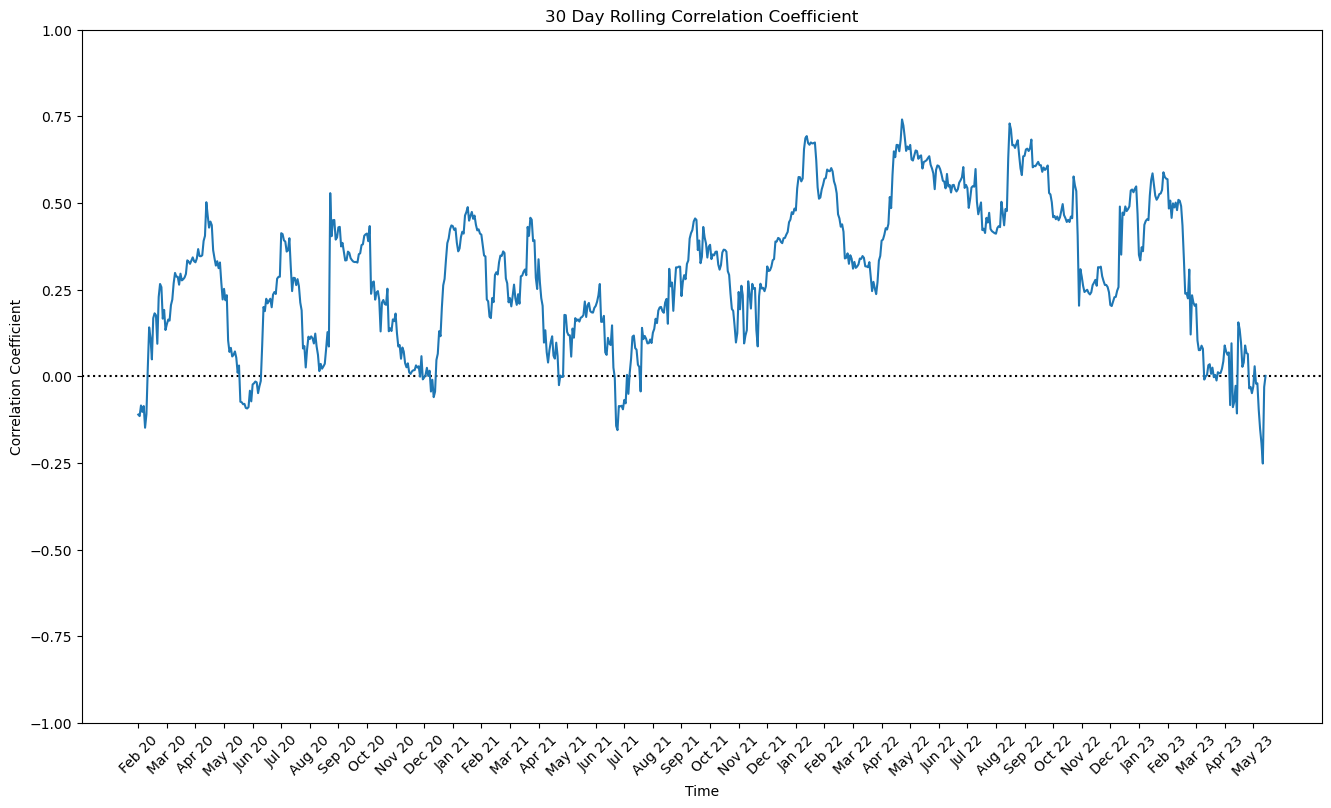

In [19]:
# Create plot and set figure size
fig, ax = plt.subplots(figsize = (16, 9))
# Set title
ax.set_title("30 Day Rolling Correlation Coefficient")
# Change x-axis Label
ax.set_xlabel("Time")
# Set dotted line across x-axis at y = 0
ax.axhline(0, color = "black", linestyle = "dotted")
# Set correlation coefficient limits
plt.ylim(-1, 1)
# Set x-axis ticks to monthly
# Generate an index position for every month
xtick_positions = range(0, len(df["Date"]), len(df["Date"]) // 39)
# Get date with index position
# Create date time object with date
# Convert date format
xtick_labels = pd.to_datetime(df["Date"].iloc[xtick_positions]).dt.strftime("%b %y")
plt.xticks(xtick_positions, xtick_labels, rotation = 45)
# Set data points
sns.lineplot(data = df, x = "Date", y = "Correlation Coefficient")
plt.show()

### **Chart observation**

Based on the 30-day rolling correlation coefficient chart, we can observe the following:
- The chart lacks consistency and fluctuates significantly
- The majority of the months show a positive correlation, with May 2022 marking the highest point
- The negative correlation is also evident on several occasions, with May 2023 marking the lowest point

These observations show that the relationship between the S&P 500 Index and Bitcoin is complex and highly dynamic, with large fluctuations over time. Despite periods of positive correlation, there are also instances of negative correlation, with the most notable dip being May 2023. This intriguing anomaly begs questions regarding the precise market sentiments and forces at work during this period.

# **6 Further Analysis**

We will conduct a deeper analysis of market sentiments in May 2023 to acquire a more in-depth understanding of what prompted the high negative correlation.

## **6.1 Tools**

The python-dotenv library is a tool to manage environment variables and is a great way to store sensitive information such as API keys. We will use this library to keep an API key. We will use the API key to retrieve cryptocurrency-related news from an API endpoint.

In [ ]:
pip install python-dotenv

The transformers library by Hugging Face is a tool that provides natural language models. We will use this library by importing a model to predict text sentiments.

In [ ]:
pip install transformers

We will use the following libraries to help us analyse our data further:

In [20]:
from dotenv import load_dotenv
from transformers import pipeline

## 6.2 Filtering the data

### **Open prices (May 2023)**

The following code filters the dataframe to May 2023:

In [21]:
# Drop irrelevant columns
df.drop(columns = ["Returns (S&P 500)", "Returns (Bitcoin)", "Correlation Coefficient"], inplace = True)
# Set Date as index temporarily to filter based on date
df.set_index("Date", inplace = True)
# Filter df to 05-2023
filtered_df = df.loc["2023-05-01":"2023-05-31"]
# Reset index
filtered_df.reset_index(inplace = True)

filtered_df.head()

,Date,Open (S&P 500),Open (Bitcoin)
0,2023-05-01,4166.79,29233.2
1,2023-05-02,4164.1,28068.26
2,2023-05-03,4122.25,28669.85
3,2023-05-04,4082.55,29026.16
4,2023-05-05,4084.73,28838.16


### **Regression plot [Open Prices (May 2023)]**

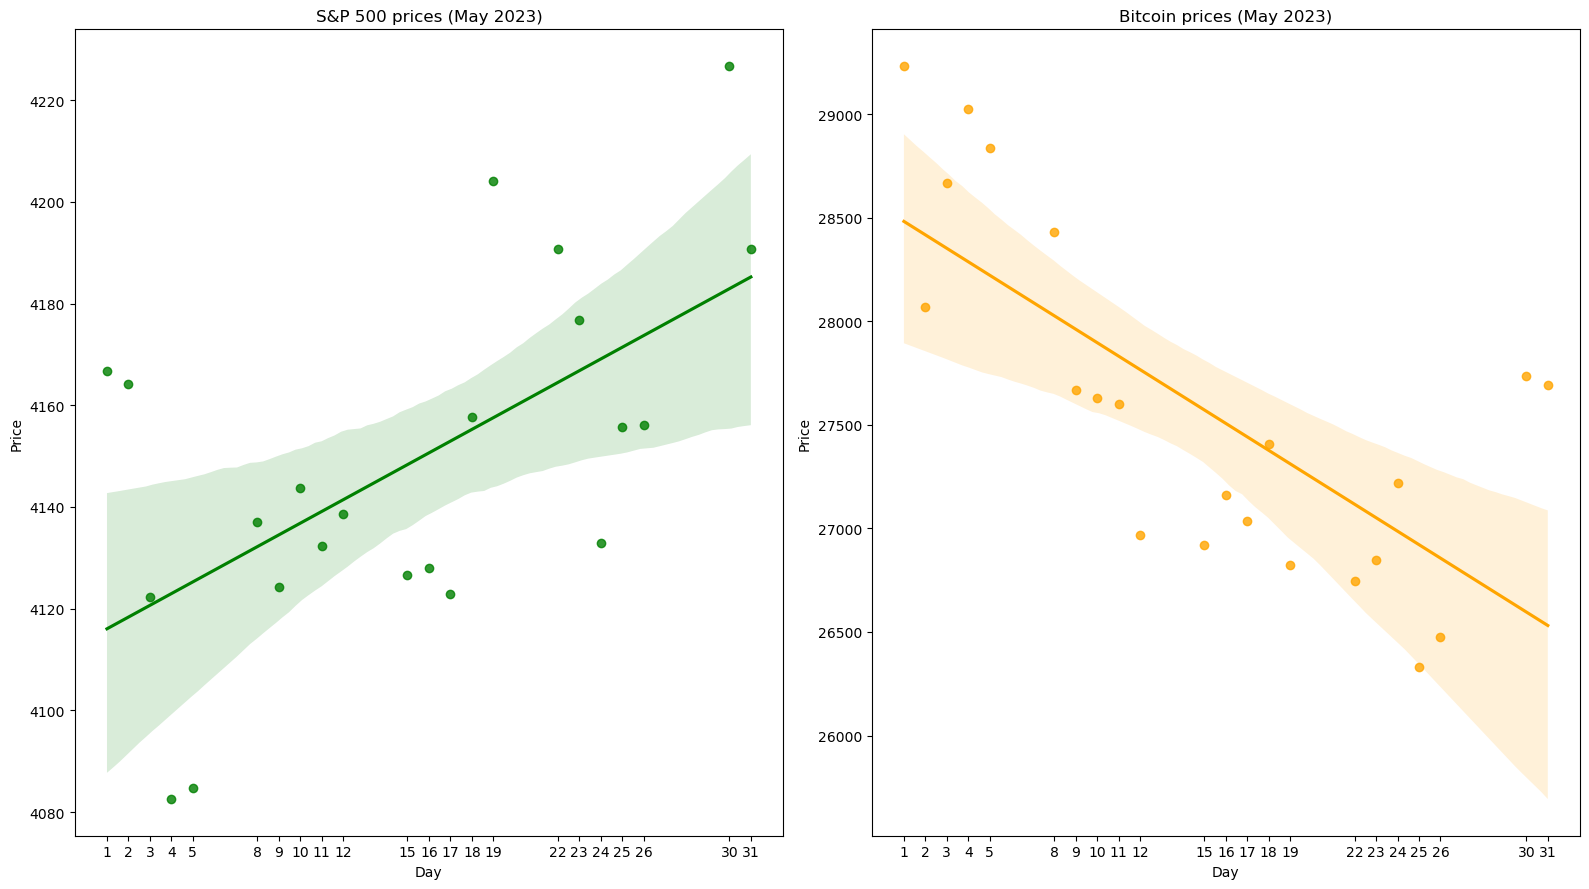

In [22]:
# Create a copy
plot_df = filtered_df.copy()
# Get day from date (YYYY-MM-DD)
plot_df["Date"] = plot_df["Date"].str.slice(-2)
# Convert all data point types to float as sns.regplot() do not accept object types
plot_df = plot_df.astype(float)
# Create plot, set no. of rows and columns and set figure size
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 9))

def reg_plot(index, asset, color):
    # Set data points and colour
    sns.regplot(ax = axes[index], data = plot_df, x = "Date", y = f"Open ({asset})", color = color)
    # Set title
    axes[index].set_title(f"{asset} prices (May 2023)")
    # Set x and y axis labels
    axes[index].set_xlabel("Day")
    axes[index].set_ylabel("Price")
    # Set x-axis ticks to show all days
    axes[index].set_xticks(plot_df["Date"])

# S&P 500 regression plot
reg_plot(0, "S&P 500", "green")
# Bitcoin regression plot
reg_plot(1, "Bitcoin", "orange")

plt.tight_layout()
plt.show()

### **Chart Observation**

Based on the price charts, we can observe the following:
- The linear regression of the S&P 500 Index in May 2023 indicates a positive uptrend
- The linear regression of Bitcoin in May 2023 indicates a negative downtrend

Based on these observations, we can draw a direct link explaining why May 2023 is the month with the lowest negative correlation between the two assets. We must look into the market's attitude to understand more about Bitcoin's notable fall in May 2023. The upcoming analysis will extract news titles from various notable sources and then feed them into a pre-trained model for sentiment analysis. The goal is to uncover the fundamental causes impacting Bitcoin's performance in May 2023 by correlating these thoughts with observable price fluctuations.

## **6.2 Retrieving News Data**

We can find Bitcoin-related news on websites such as Coindesk [9] and Cointelegraph [10]. However, these websites have an anti-scraping solution that prevents data extraction using the BeautifulSoup library. Fortunately, there is an alternative solution using a free API provided by CryptoCompare [11]. Coindesk and Cointelegraph have granted CryptoCompare access to retrieve news data.

However, one of the limitations of this API is that each successful call only returns a maximum of 50 news data, which only covers some Bitcoin-related news in May 2023. To address this issue, we created a function that recursively calls the API to gather all news data in May 2023.

In [23]:
# Store news titles
news_titles = []
# Retrieve api key from environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")
# Specify start timestamp
start_timestamp = to_unix_timestamp("2023-05-01T00:00:00+00:00")
# Specify end timestamp
end_timestamp = to_unix_timestamp("2023-05-31T00:00:00+00:00")

def get_news_titles(end_time):
    # Stop recursion if end timestamp <= specified start timestamp
    if end_time <= start_timestamp: return
    
    # Get bitcoin news before specified end timestamp
    response = requests.get(f"https://min-api.cryptocompare.com/data/v2/news/?feeds=coindesk,cointelegraph&categories=BTC&lTs={end_time}&api_key={news_api_key}")
    # Parse response into json format
    news_data = response.json()

    # Go through each news data
    for news in news_data["Data"]:
        # Stop going through each news data if current news data timestamp <= specified start timestamp
        if news["published_on"] <= start_timestamp: break
        # Add news title into news_titles list
        news_titles.append(news["title"])

    # Update end timestamp to last news data timestamp
    end_timestamp = news_data["Data"][-1]["published_on"]
    # Recall function with updated end timestamp
    get_news_titles(end_timestamp)

# Get news titles from specified start to end timestamp
get_news_titles(end_timestamp)
# Create dataframe from news_titles list
news_df = pd.DataFrame(data = news_titles, columns = ["Title"])   

news_df.head()

,Title
0,Bitcoin Edges Below $28K as Investors Eye U.S....
1,ProShares’ Bitcoin Futures ETF Underperforms B...
2,Bitcoin on-chain and options data hint at a de...
3,CoinDesk Turns 10: 2021 – The Year Bitcoin Bec...
4,Should Russia Bolster or Ban Bitcoin?


## **6.3 Sentiment Analysis**

### **Predicting text sentiments**

The "distilbert-base-uncased-finetuned-sst-2-english" model from Hugging Face [12] is a model that predicts positive or negative sentiments in text. That makes it perfect for analysing Bitcoin market sentiments.

The following code feeds all news titles into the sentiment analysis model:

In [24]:
# Store sentiment results
sentiment_results = []
# Load pre-trained sentiment analysis model
sentiment_model = pipeline("sentiment-analysis", model = "distilbert-base-uncased-finetuned-sst-2-english")

# Go through each news title
for news_title in news_titles:
    # Feed each news title into model for sentiment analysis and store results into a list
    sentiment_results.append(sentiment_model(news_title))

# Add Sentiment results into news dataframe
news_df["Sentiment"] = [label[0]["label"] for label in sentiment_results]

news_df.head()

,Title,Sentiment
0,Bitcoin Edges Below $28K as Investors Eye U.S....,NEGATIVE
1,ProShares’ Bitcoin Futures ETF Underperforms B...,NEGATIVE
2,Bitcoin on-chain and options data hint at a de...,POSITIVE
3,CoinDesk Turns 10: 2021 – The Year Bitcoin Bec...,NEGATIVE
4,Should Russia Bolster or Ban Bitcoin?,NEGATIVE


### **Bar plot (Bitcoin Market Sentiments)**

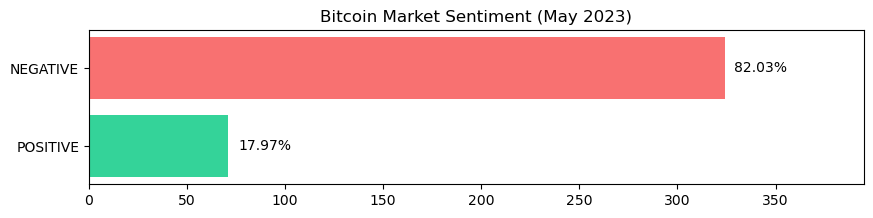

In [25]:
# Create plot and set figure size
fig, axes = plt.subplots(figsize = (10, 2))

# Get value counts for positive and negative sentiments
sentiment_count = news_df["Sentiment"].value_counts()
# Plot positive and negative bar plot
axes.barh(0, sentiment_count["POSITIVE"], color = "#34d399")
axes.barh(1, sentiment_count["NEGATIVE"], color = "#f87171")

# Set title
axes.set_title("Bitcoin Market Sentiment (May 2023)")
# Set x limit to total number of news
axes.set_xlim(0, len(news_df))
# Set y-axis labels and ticks
axes.set_yticks([0, 1])
axes.set_yticklabels(["POSITIVE", "NEGATIVE"])
# Calculate percentage of positive and negative sentiments
positive_pct = round(sentiment_count["POSITIVE"] / len(news_df) * 100, 2)
negative_pct = round(sentiment_count["NEGATIVE"] / len(news_df) * 100, 2)
# Add percentage into bar plot
axes.text(sentiment_count["POSITIVE"] + 5, 0, f"{positive_pct}%", va = "center")
axes.text(sentiment_count["NEGATIVE"] + 5, 1, f"{negative_pct}%", va = "center")

plt.show()

### **Chart Observation**

Based on the sentiment bar chart, we can observe the following:
- The market sentiment towards Bitcoin was extremely poor in May 2023 at 82.03%

Based on this observation, it is clear that such negativity played a significant influence in instilling fear, uncertainty, and doubt in investors. That caused Bitcoin prices to plummet tremendously, explaining why May 2023 was the lowest point in the correlation coefficient.

# **7 Conclusion**
In conclusion, the correlation between the S&P 500 Index and Bitcoin is highly complex. An overall correlation coefficient of 0.30 (2p.) indicates a weak to moderate positive correlation. However, such an indication does not fully capture fluctuations over time. The 30-day rolling correlation coefficient revealed these fluctuations with notable outliers, such as in May 2023, when the correlation coefficient dipped to its lowest in the last 3.5 years.

In May 2023, the S&P 500 Index saw a positive trend, whereas Bitcoin saw a decline. This inverse relationship between the two assets gives a clear explanation for the period's low correlation coefficient. Further analysis of market sentiments revealed tremendous negativity toward Bitcoin, which confirms its downward trajectory.

These findings suggest the importance of considering market sentiments and statistical measurements when evaluating asset correlations. In addition, the highly negative sentiment in May 2023 proves how vital these sentiments can be in influencing market behavior— we can achieve a deeper understanding of how the market works by bridging observed negative correlations with sentiment analysis.

## **7.1 References and Resources**
- [1] Yahoo Finance. (2023) S&P 500 INDEX [Online]. Available from: https://finance.yahoo.com/quote/%5ESPX/history?p=%5ESPX [12 June 2023].
- [2] Google Finance. (2023) S&P 500 INDEX [Online]. Available from: https://www.google.com/finance/quote/.INX:INDEXSP [12 June 2023].
- [3] Polygon.io. (2023) Stock API [Online]. Available from: https://polygon.io/stocks [12 June 2023].
- [4] Binance. (2023) Historical Market Data [Online]. Available from: https://www.binance.com/en/landing/data [15 June 2023].
- [5] Github. (2023) Binance Public Data [Online]. Available from: https://github.com/binance/binance-public-data/tree/master [15 June 2023].
- [6] CoinMarketCap. (2023) API Documentation [Online]. Available from: https://pro.coinmarketcap.com/api/documentation/v1/# [16 June 2023].
- [7] CoinGecko. (2023) Explore the API [Online]. Available from: https://www.coingecko.com/en/api/documentation [16 June 2023].
- [8] Fernando, J. (2023) The Correlation Coefficient: What It Is, What It Tells Investors [Online] Investopedia. Available from: https://www.investopedia.com/terms/c/correlationcoefficient.asp [19 June 2023].
- [9] Coindesk. (2023) Bitcoin [Online]. Available from: https://www.coindesk.com/search?s=Bitcoin&cf=Markets [22 June 2023].
- [10] Cointelegraph. (2023) Bitcoin News [Online]. Available from: https://cointelegraph.com/tags/bitcoin [22 June 2023].
- [11] CrytoCompare. (2023) Latest News Articles [Online]. Available from: https://min-api.cryptocompare.com/documentation?key=News&cat=latestNewsArticlesEndpoint [22 June 2023].
- [12] Hugging Face. (2023) DistilBERT base uncased finetuned SST-2 [Online]. Availble from: https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english#distilbert-base-uncased-finetuned-sst-2 [23 June 2023].